<a href="https://colab.research.google.com/github/mehak-sachdeva/Block.16/blob/master/King_county_house_price_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> Multiscale Geographically Weighted Regression Workshop </center>
<center> Mehak Sachdeva </center>
<center> Spatial Analysis Research Center </center>
<center> School of Geographical Sciences and Urban Planning </center>
<center> Arizona State University </center>



## Introduction to the Workshop

#### Spatial Patterns and Processes

The spatial data that we observe in the world around us are manifestations of underlying spatial processes. To understand why things are the way they are and how they work, we often model estimates for the spatial patterns to uncover the spatial processes that affect them. The spatial associations or relationships that we model between spatial processes and pattern data help inform on the spatial processes which cannot be directly observed.

In [0]:
from google.colab import files
from IPython.display import Image

In [0]:
#@title Spatial Models
from google.colab import files
from IPython.display import Image
uploaded = files.upload()
Image('spatial_models.PNG',width = 800)

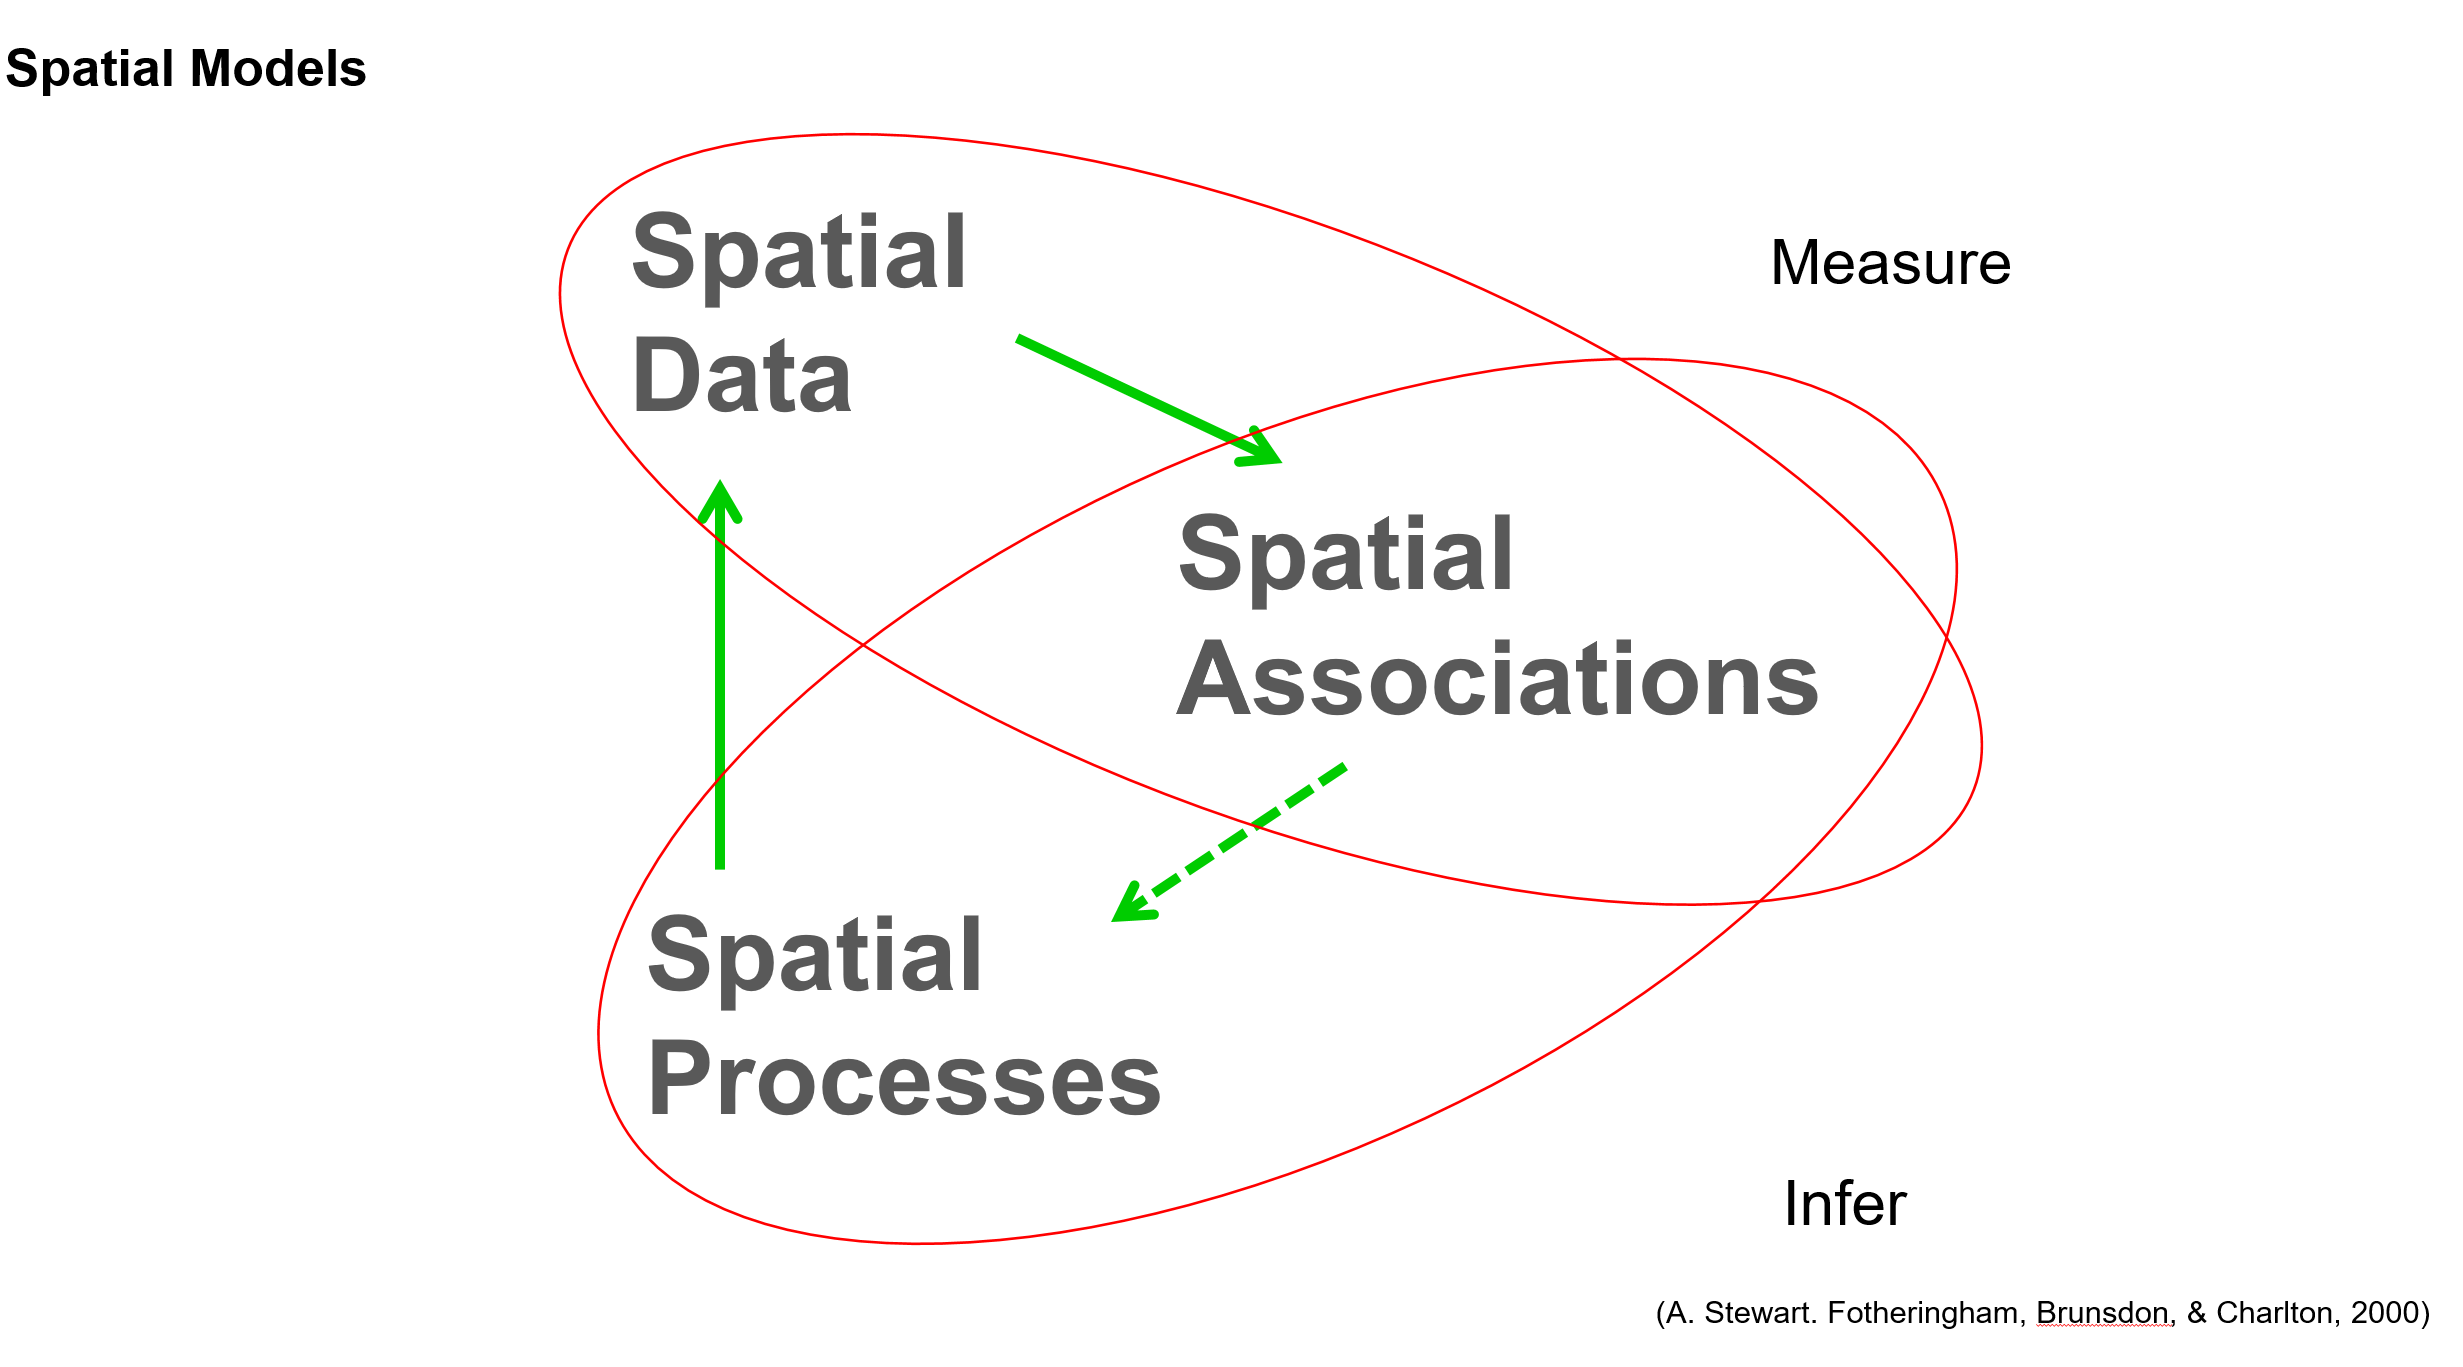

## Examples of associations between spatial processes and spatial patterns
### 1. Simple New York Skyline example

Below is a cross-sectional view of the Manhattan skyline. As we can observe, downtown and midtown have a heavy concentration of high-rise buildings while the areas between the two has mostly mid-rise buildings. This is clearly an observed pattern which is possibly a result of many underlying processes that make construction of higher buildings more viable in some areas compared to others.


In [0]:
#@title Manhattan Skyline
from google.colab import files
from IPython.display import Image
uploaded = files.upload()
Image('skyline.jpg',width = 800)

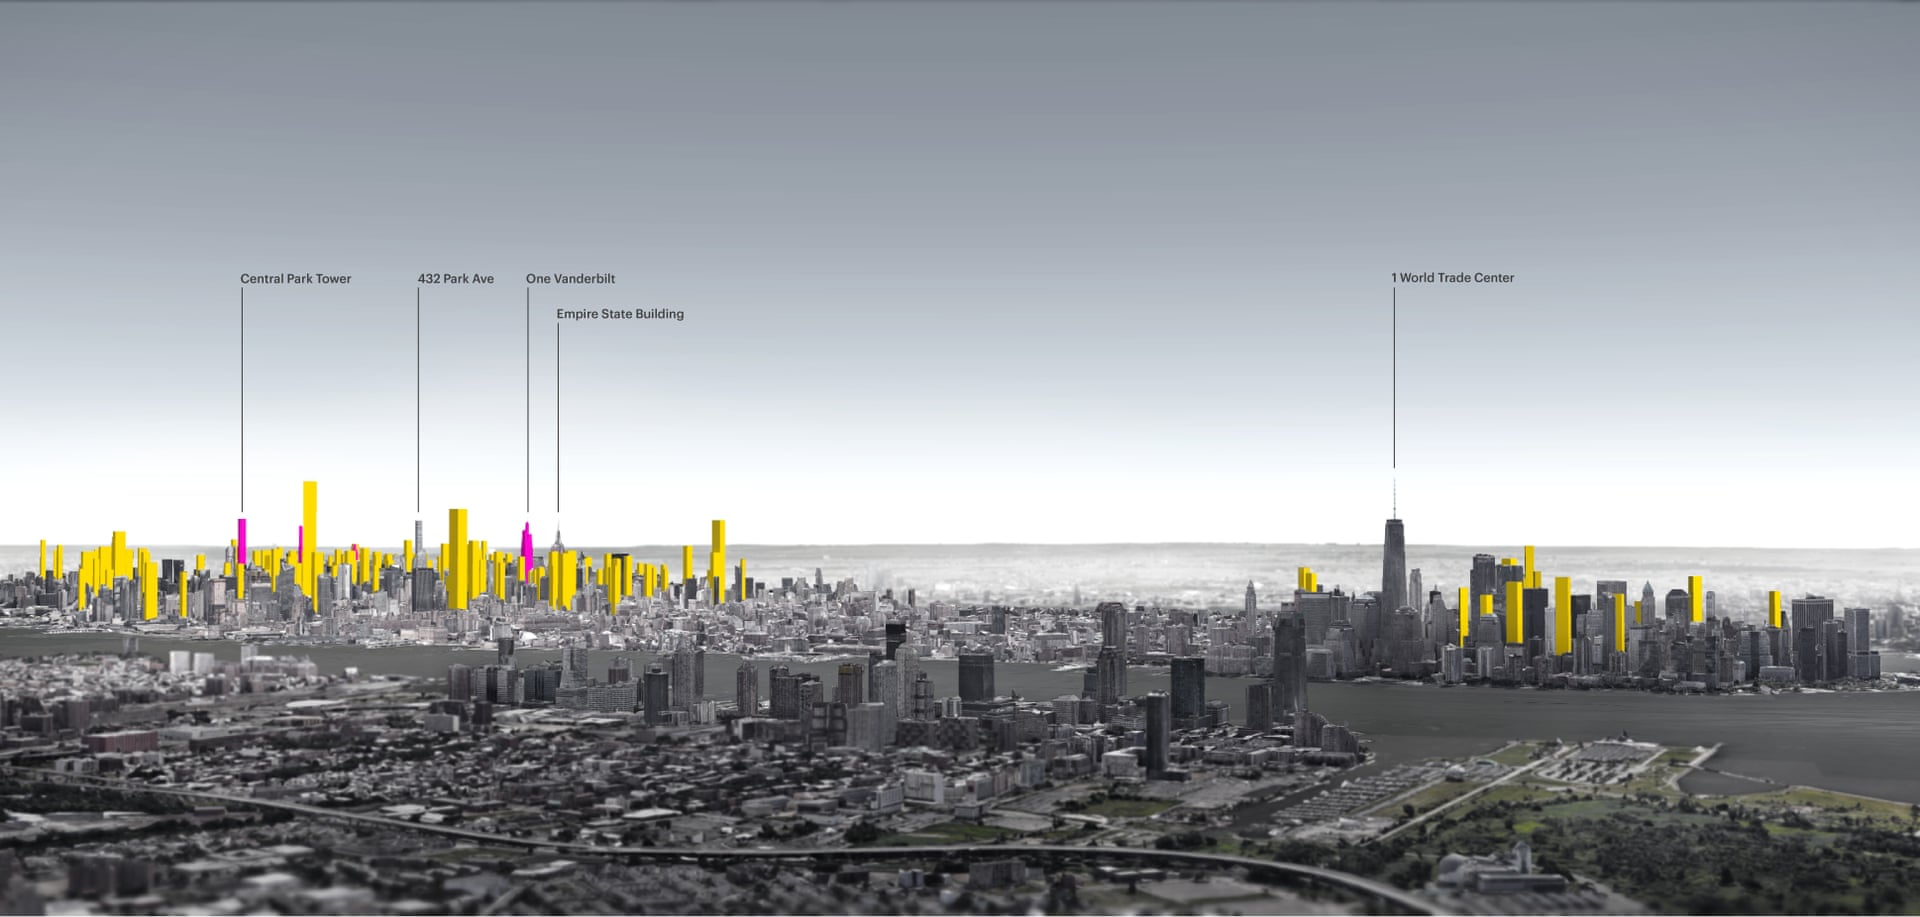

### Underlying processes affecting density of high-rises in Manhattan

On a closer and deeper look into the geography of Manhattan it can be seen that the bedrock of the borough is a major driver in the city's uneven density of high-rise buildings. In this simple example we see how the sub-strata of Manhattan, **a spatial process** otherwise invisible, manifests itself into the defining skyline of the city, **the observed spatial pattern**. Such associations are often helpful to model in order to understand what forms and affects the spatial data we observe in the world.

In [0]:
#@title Processes affecting the Manhattan Skyline
from google.colab import files
from IPython.display import Image
uploaded = files.upload()
Image('bedrock_diagram.jpg',width = 1000)

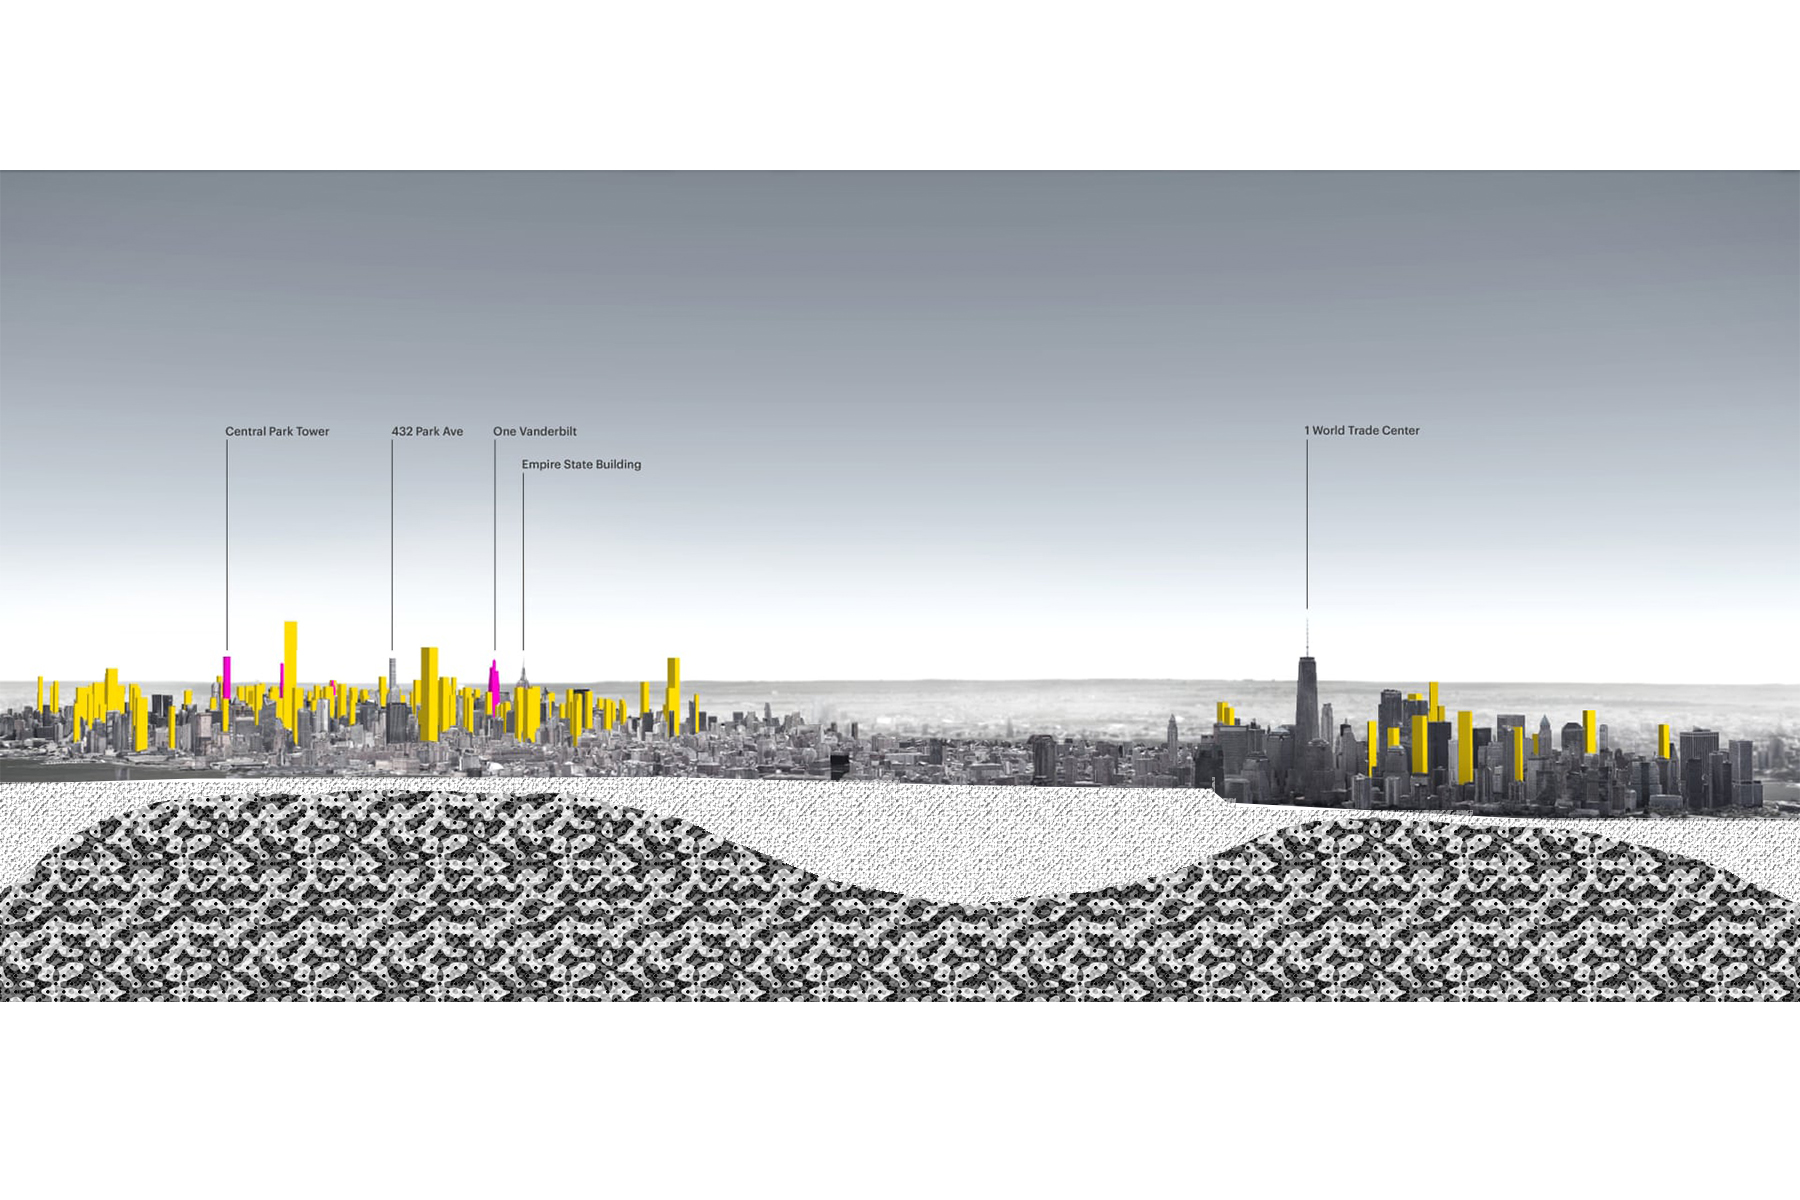

### 2. Example of a complex phenomenon - Human Migration
Migration is a complex social phenomenon and is often a result of many processes, often operating at different spatial scales. For example, if a massive movement of people from one city to another is observed and we are interested in understanding what could be leading to the displacement, trying to model the processes that could be affecting it would be a good approach. For instance, a political conflict at a local scale could be forcing people to move out of a city, or lack of economic opportunity due to restrictive policies at the regional scale could be affecting it. Or something even more complex such as climate change which is a global phenomena would be leading to either or both of these issues and affecting human migration. This example, brings to the forefront the issue of spatial scale of processes that affect the pattern we observe. There is no way of understanding human migration if processes operating at different scales are not considered and the scales at which the processes most affect the pattern are unknown. This is true for most of the complex phenomena we observe in the world.

In [0]:
#@title Processes affecting Human Migration
uploaded = files.upload()
Image('human_migration.PNG',width = 800)

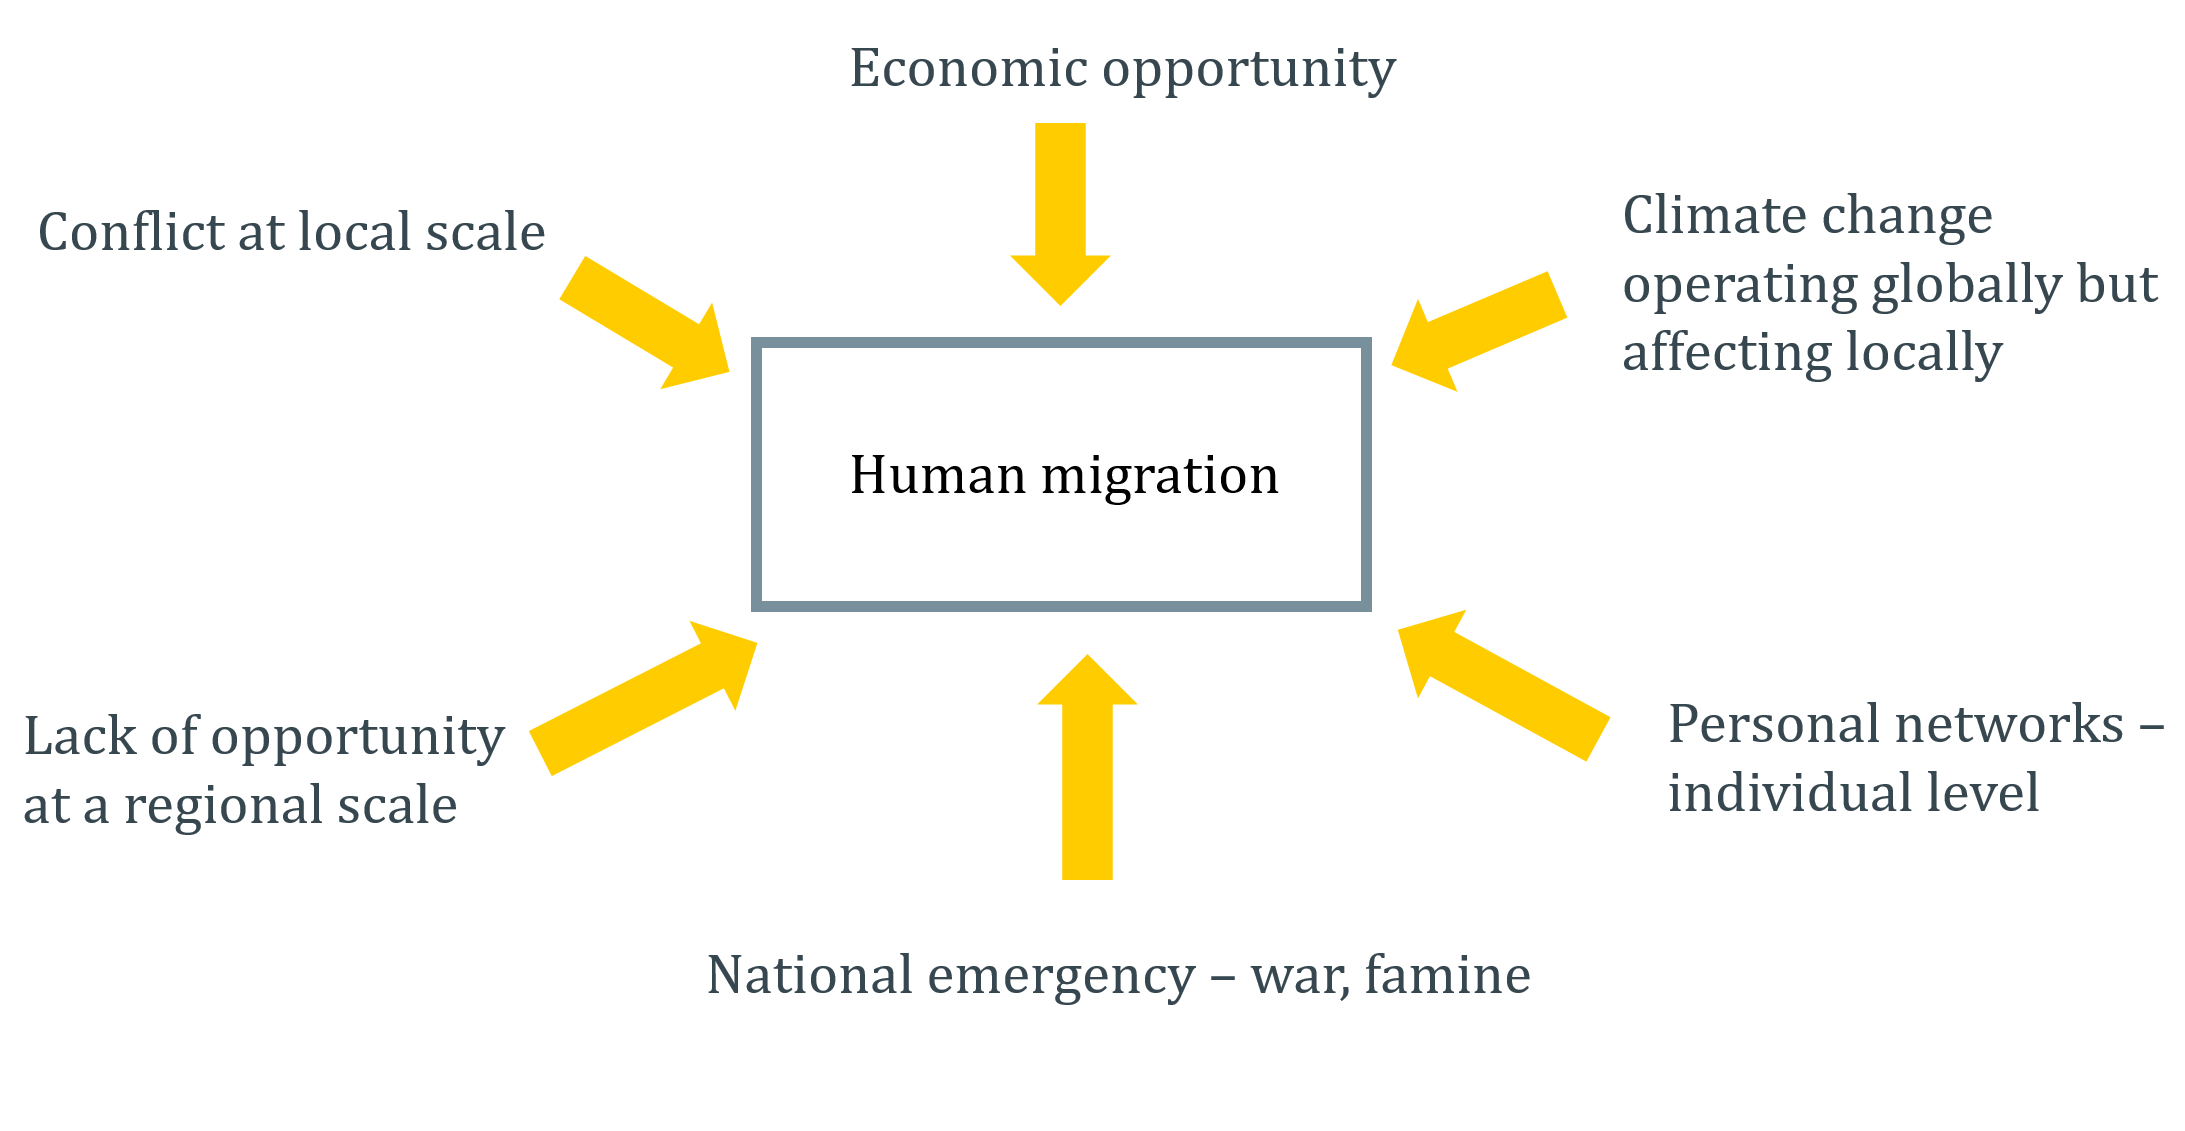

## Regression Models
Models often used to estimate relationships between processes and how they affect the spatial data we observe in the world are broadly classified under the umbrella of **regression**. 
Let's jump right into the problem we are going to work on in this workshop and understand the concepts of regression working through it. 

### Hedonic House Price modeling
Since the value of the attributes of a housing unit cannot be directly measured, a method called the hedonic modeling is applied to a housing unit price such that it could be decomposed into estimated prices for various characteristics - structural, neighborhood and locational. A typical house price model can be written as:

In [0]:
#@title Traditional Hedonic House Price models
uploaded = files.upload()
Image('traditional_hedonic_modedl.PNG',width = 600)

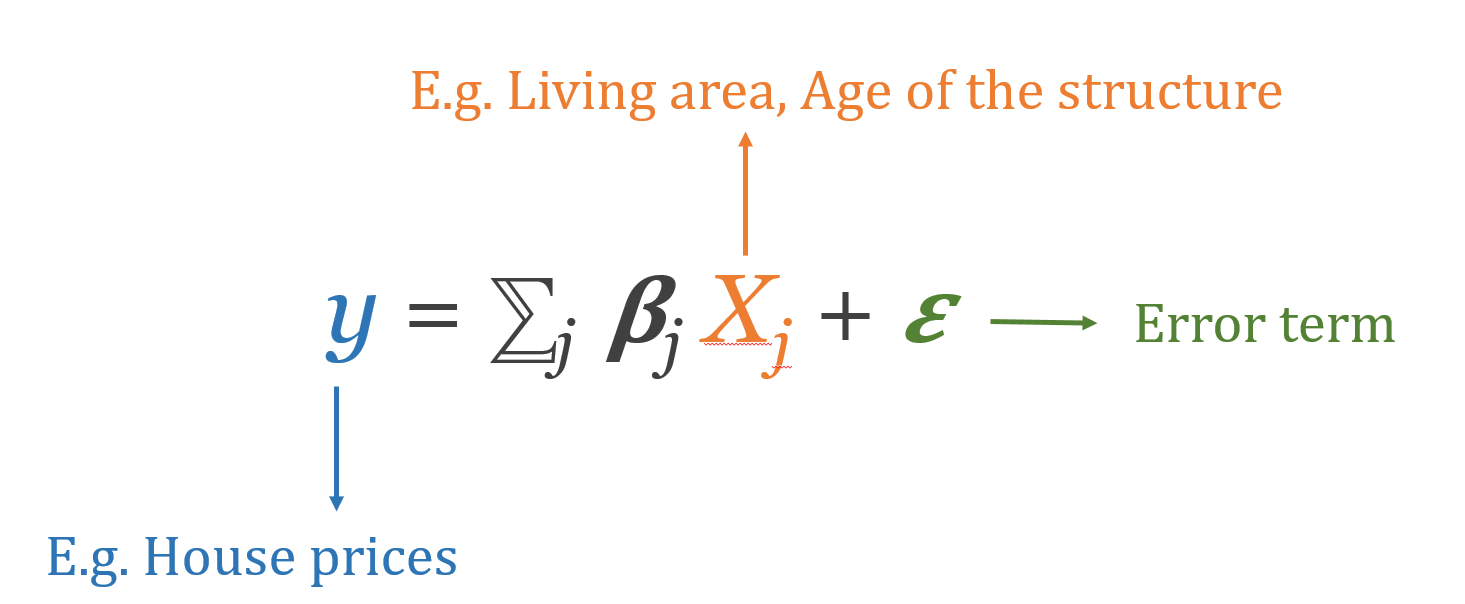

The *Xs* are the independent variables or **processes** that affect the dependent variable *y* or **observed patterns** with the magnitude and direction modeled by the *Betas*. These are the coefficient estimates that define how much and in what direction would a process affect the pattern. For example, in the equation above if the beta assumes a value of + 5, this would be interpreted as the change in house price expected with an increase of living area by one unit. Consquently, if we have house price data for a city, we can easily understand how increase in living area and other such attributes of a housing unit would affect house prices in the region. 

**However, can you see the obvious limitaion in using this equation for the data of an entire city?**

## Spatial Dependency and Heterogeneity

In the equation above, the betas defining the relationship between the processes and patterns are averages across the entire study area!
This would suggest that an increase in living area of a housing unit would affect the house price of the unit by the exact same amount no matter where the unit is located in the city. Is that a fair assumption?

**For instance, would you expect the size of a housing unit to have the same marginal cost in Manhattan as compared to that in Staten Island?**

In [0]:
#@title Global regression estimates
uploaded = files.upload()
Image('global_regression_estimate.PNG',width = 800)

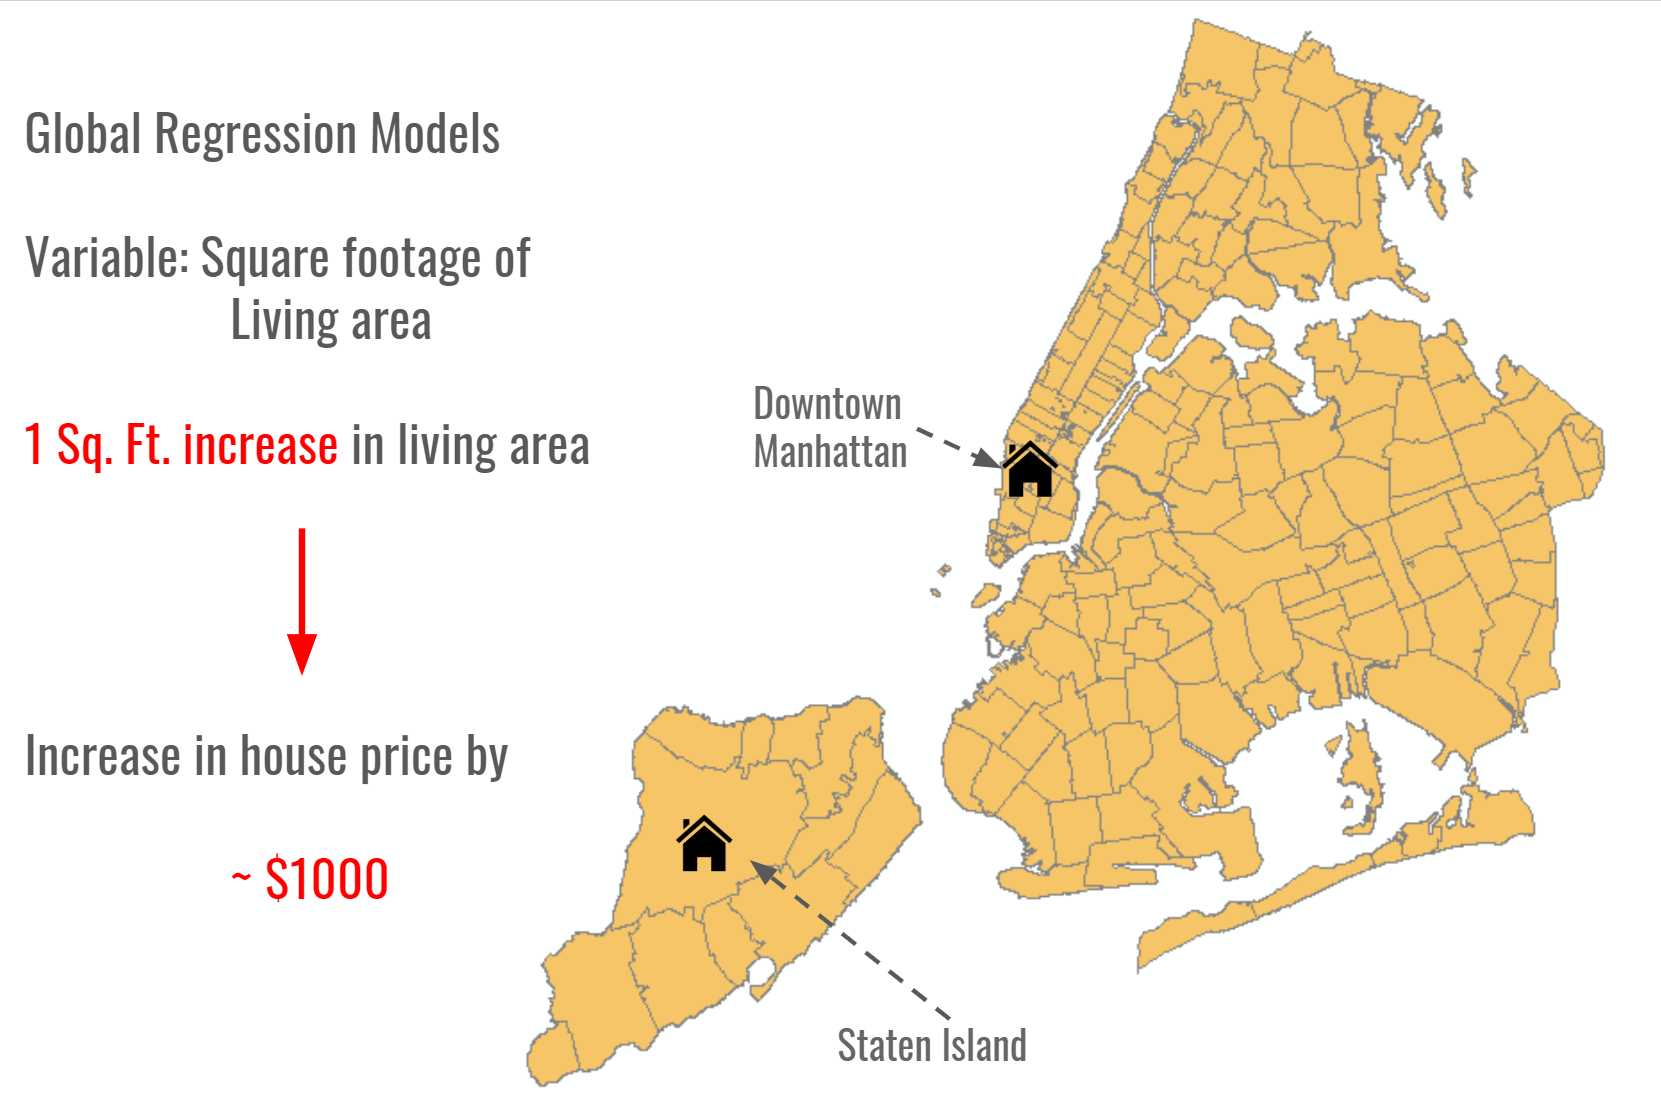

 **Perhaps, not.**  

Spatial phenomenon exhibit spatial heterogeneity - we expect values to be higher in some places and lower in others. In the context of house prices in a city for example, housing units with the same structural characteristics are valued differently in different areas of a city. This would then imply that the same stimulus across a city such as an increase in living area of a housing unit, would affect the housing cost differently in different areas. For example, a more accurate map of the marginal cost of living area in New York City would be as below - where adding a unit square feet of space in downtown Manhattan would increase the housing price by a lot more than that in Staten Island. 

In [0]:
#@title Local regression estimates
uploaded = files.upload()
Image('local_regression_results.PNG',width = 800)

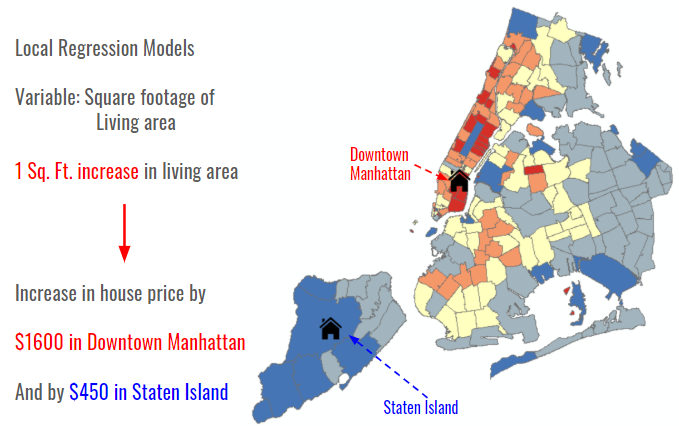

Most social phenomenon exhibit such properties where global regression of the kind discussed above are often misspecifications of reality and do not give us much information about the processes affecting the pattern under examination. A branch of spatial regression, that considers the special characterstics of spatial data and phenomenon and looks for explanations for observed variations across space is called local regression - **Geographically Weighted Regression** is an example of the kind. 

## Geographically Weighted Regression (GWR)


In [0]:
#@title Geographically Weighted Regression
uploaded = files.upload()
Image('gwr.PNG',width = 600)

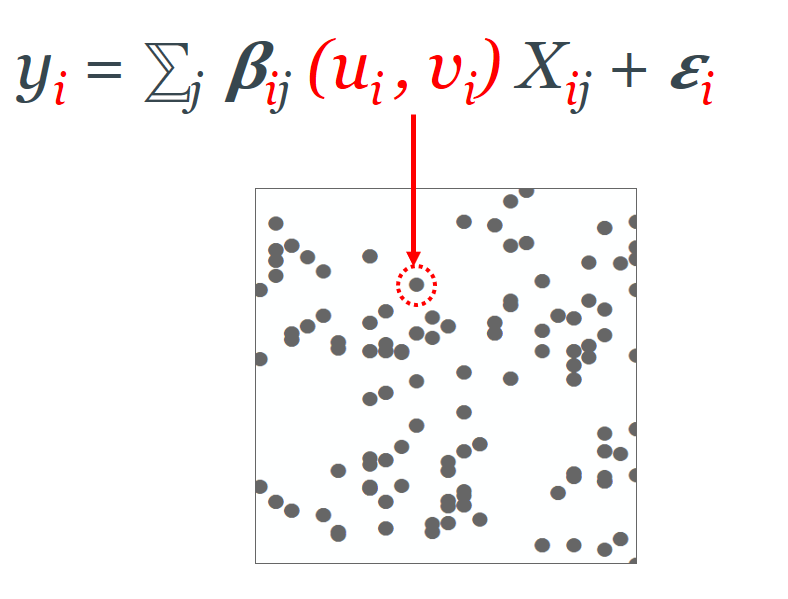

Since the global models provide an average coefficient estimate for each predictor variable across the study area, they inherently assume the relationships tp be constant across space. That is however, not always true.
GWR relaxes this assumption and provides a unique coefficient estimate for each location and for each covariate. The GWR model is essentially an ensemble of OLS regressions calibrated at each individual location of the study area which is reflected by the *(ui,vi)* in the equation here.

In [0]:
#@title Ensemble of regressions
uploaded = files.upload()
Image('data_borrowing.PNG',width = 600)


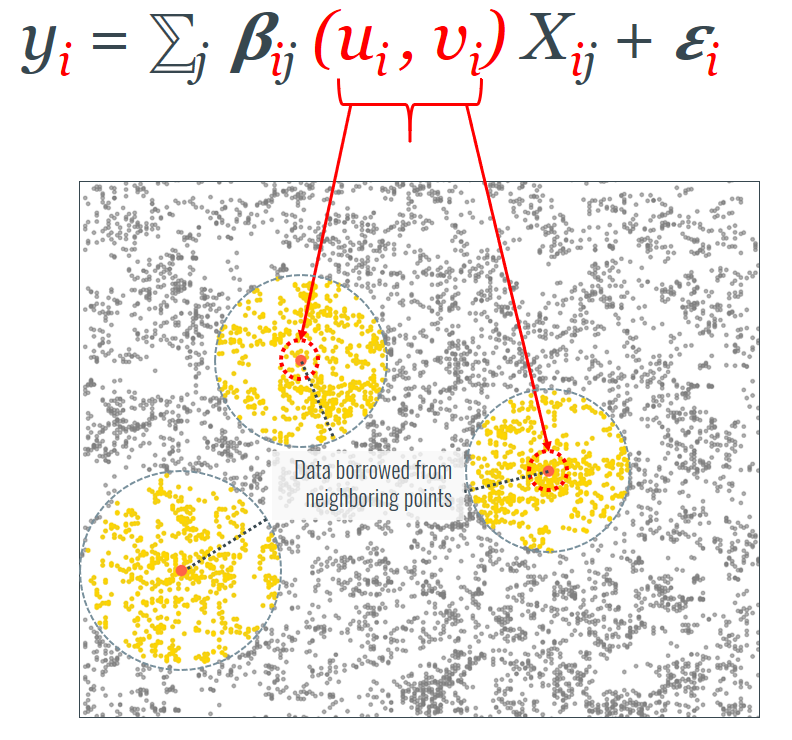

To calibrate a regression model at each location would technicaly require multiple unique data points at the same location. Since that kind of data is extemely hard to find, GWR gets around the problem by borrowing data from geographically neighboring locations. This is in accordance with **Tobler's Law** of spatial dependence. The number of neighboring data values used to calibrate a model is obtained using an optimization criterion such as AIC or cross-validation and the parameter is called the **bandwidth**. The bandwidth is interpreted as an indicator of scale at which the spatial processes have the most to contribute to the formation of the spatial pattern being examined. 

In [0]:
#@title Bandwidth as an indicator of scale
uploaded = files.upload()
Image('bandwidth.PNG',width = 800)

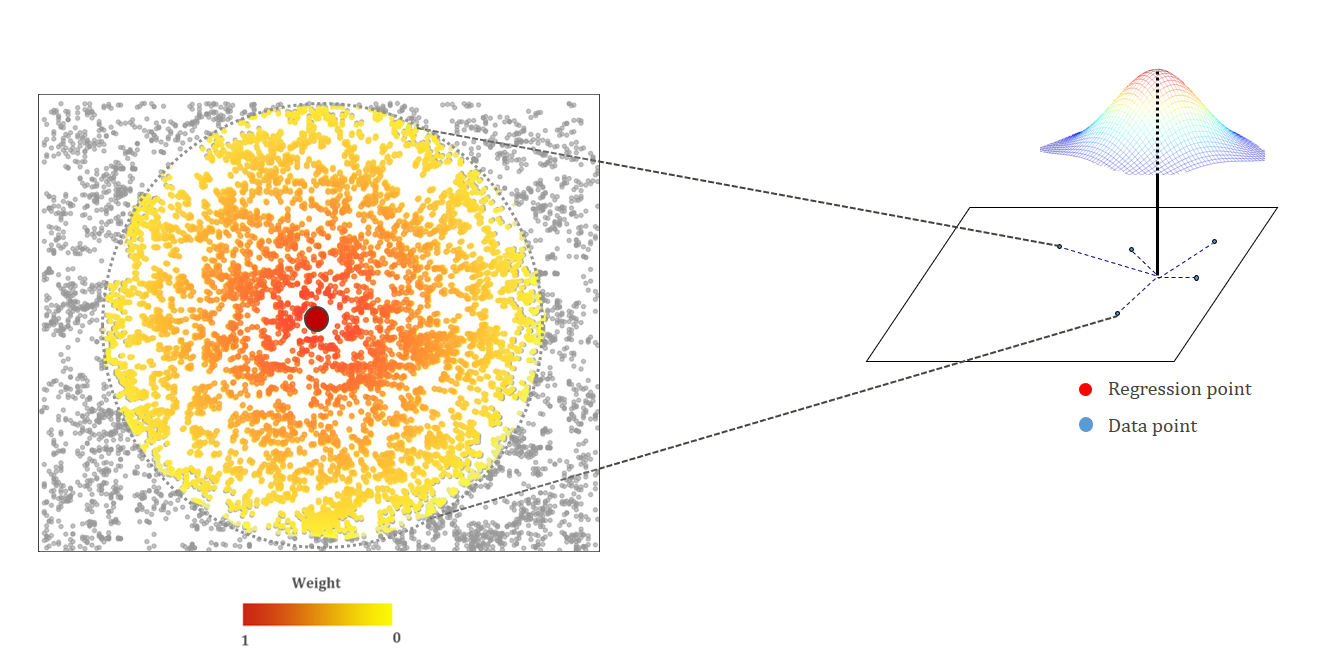

Instead of weighing each neighboring value equally, a smoothing kernel is used to weigh closer values more than the distant ones.

# Installing and importing libraries for Python and R 

In [0]:
#@title Python installation of custom libraries

! pip install -U mgwr
! pip install geopandas
! pip install pyshp
!curl -L http://download.osgeo.org/libspatialindex/spatialindex-src-1.8.5.tar.gz 2>/dev/null | tar xz
!apt-get install -qq g++ make
import os
os.chdir('/content/spatialindex-src-1.8.5')
!./configure 2>&1 >/dev/null && make 2>&1 >/dev/null && make install && ldconfig
!pip install -q rtree
!pip install matplotlib_scalebar

In [0]:
#@title Python imports
# A bit of imports
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Load in the r magic
%reload_ext rpy2.ipython
%config IPCompleter.greedy=True
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
import geopandas as gpd
from shapely.geometry import Point, Polygon
%matplotlib inline
sns.set(color_codes=True)
from sklearn import linear_model
from matplotlib.colors import LinearSegmentedColormap
from matplotlib_scalebar.scalebar import ScaleBar
import statsmodels.api as statm

import libpysal as ps
from mgwr.gwr import GWR
from mgwr.gwr import MGWR
from mgwr.sel_bw import Sel_BW
from spglm.family import Gaussian, Binomial, Poisson
import multiprocessing as mp
pool = mp.Pool()
import io

In [0]:
#@title R installation of custom libraries
%%R
install.packages("cowplot")
install.packages("ggplot2")
install.packages("gridExtra")
install.packages("tidyverse")

In [0]:
#@title R imports
%%R 

# r imports

library(readxl)
library(dplyr)
library(tidyr)
library(tidyverse)
library(reshape2)

# For plots
library(ggplot2)
library(grid)
library(gtable)
library(gridExtra)
library(cowplot)

# string manip
library(stringr)

In [0]:
# Mounting the drive to import data from

#from google.colab import drive
#drive.mount('/content/gdrive')

In [35]:
from google.colab import files
uploaded = files.upload()

Saving final_block_groups_final.csv to final_block_groups_final (1).csv


In [0]:
#@title Importing the csv file for use

blocks = pd.read_csv(io.StringIO(uploaded['final_block_groups_final.csv'].decode('utf-8')),sep=',')


# Block group house sales price data

## Downloading data

In [0]:
#blocks = pd.read_csv("/content/gdrive/My Drive/final_block_groups_final.csv")

In [0]:
blocks.columns

Index(['the_geom', 'avg_tech', 'latitude', 'cartodb_id', 'houses', 'avg_unemp',
       'longitude', 'avg_index', 'avg_price', 'avg_basement', 'avg_sqft',
       'avg_water_dist', 'avg_age'],
      dtype='object')

## Log transformation of variables for log-log hedonic model

In [0]:
#converting columns to logged columns for all continuous variables

blocks['round_basement']=np.round(blocks['avg_basement'])
blocks['ln_price'] = np.log(blocks['avg_price'])
blocks['ln_index'] = np.log(blocks['avg_index'])
blocks['ln_unemp'] = np.log(blocks['avg_unemp'])
blocks['ln_tech'] = np.log(blocks['avg_tech'])
blocks['ln_water_dist'] = np.log(blocks['avg_water_dist'])
blocks['ln_age'] = np.log(blocks['avg_age'])
blocks['ln_sqft'] = np.log(blocks['avg_sqft'])

# Global Regression Model - Ordinary Least Squares

In [0]:
X=blocks[['ln_sqft','ln_age','round_basement','ln_water_dist','ln_tech','ln_index','ln_unemp']].copy()
X_std = (X-X.mean(axis=0))/X.std(axis=0)
X_std=statm.add_constant(X_std)
y=blocks['ln_price']
y_std = (y-y.mean(axis=0))/y.std(axis=0)
model = statm.OLS(y_std,X_std).fit()
predictions=model.predict(X_std)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     1173.
Date:                Wed, 06 May 2020   Prob (F-statistic):               0.00
Time:                        14:48:21   Log-Likelihood:                -508.78
No. Observations:                1255   AIC:                             1034.
Df Residuals:                    1247   BIC:                             1075.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -4.311e-14      0.010  -4.19e-12      1.000      -0.020       0.020
ln_sqft            0.5221      0.012     43.321      0.000       0.498       0.546
ln_age             0.0751      0.012      6.236      0.000       0.051       0.099
round_basement     0.0202      0.011      1.763      0.078      -0.002       0.043
ln_water_dist     -0.2619      0.013    -19.834      0.000      -0.288      -0.236
ln_tech            0.3068      0.017     18.124      0.000       0.274       0.340
ln_index          -0.0635      0.012     -5.230      0.000      -0.087      -0.040
ln_unemp          -0.2432      0.017    -14.624      0.000      -0.276      -0.211
==============================================================================
Omnibus:                       64.927   Durbin-Watson:                   0.878
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              149.929
Skew:                           0.297   Prob(JB):                     2.77e-33
Kurtosis:                       4.586   Cond. No.                         3.39
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Geographically Weighted Regression

In [0]:
coords = np.array(list(zip(blocks['longitude'],blocks['latitude'])))
y = np.array(blocks['ln_price']).reshape((-1,1))
y_std = (y-y.mean(axis=0))/y.std(axis=0)
X=blocks[['ln_sqft','ln_age','round_basement','ln_water_dist','ln_tech','ln_index','ln_unemp']].values
X_std=(X-X.mean(axis=0))/X.std(axis=0)
selector_gwr = Sel_BW(coords, y_std, X_std)

In [0]:
%%time
bw=selector_gwr.search(pool=pool)
model_gwr=GWR(coords,y_std,X_std,bw=bw)
results_gwr = model_gwr.fit()

CPU times: user 2.69 s, sys: 428 ms, total: 3.12 s
Wall time: 13 s


In [0]:
results_gwr.R2

0.9761583447014957

In [0]:
bw

66.0

In [0]:
selector_mgwr = Sel_BW(coords, y_std, X_std, multi=True)
selector_mgwr.search(pool=pool,verbose=True)
model_mgwr = MGWR(coords,y_std,X_std,selector_mgwr,fixed=False,kernel='bisquare',sigma2_v1=True)
results_mgwr=model_mgwr.fit()

Current iteration: 1 ,SOC: 0.0050296
Bandwidths: 44.0, 44.0, 74.0, 60.0, 44.0, 44.0, 48.0, 48.0
Current iteration: 2 ,SOC: 0.0025402
Bandwidths: 44.0, 44.0, 82.0, 86.0, 56.0, 46.0, 52.0, 58.0
Current iteration: 3 ,SOC: 0.00162
Bandwidths: 48.0, 44.0, 90.0, 102.0, 68.0, 52.0, 54.0, 72.0
Current iteration: 4 ,SOC: 0.0013518
Bandwidths: 48.0, 44.0, 106.0, 274.0, 72.0, 58.0, 60.0, 84.0
Current iteration: 5 ,SOC: 0.0010808
Bandwidths: 48.0, 44.0, 106.0, 1253.0, 78.0, 62.0, 70.0, 90.0
Current iteration: 6 ,SOC: 0.0010052
Bandwidths: 48.0, 44.0, 110.0, 1253.0, 78.0, 76.0, 122.0, 98.0
Current iteration: 7 ,SOC: 0.0008918
Bandwidths: 46.0, 44.0, 115.0, 1253.0, 80.0, 94.0, 163.0, 110.0
Current iteration: 8 ,SOC: 0.0007998
Bandwidths: 46.0, 44.0, 119.0, 1253.0, 80.0, 135.0, 189.0, 110.0
Current iteration: 9 ,SOC: 0.000677
Bandwidths: 44.0, 44.0, 133.0, 1253.0, 80.0, 151.0, 205.0, 145.0
Current iteration: 10 ,SOC: 0.0005896
Bandwidths: 44.0, 44.0, 133.0, 1253.0, 80.0, 161.0, 224.0, 161.0
Current i

In [0]:
results_mgwr.R2

0.9726398380350285

In [0]:
blocks['b_constant'] = results_mgwr.params[:,0]
blocks['b_sqft'] = results_mgwr.params[:,1]
blocks['b_age'] = results_mgwr.params[:,2]
blocks['b_round_basement'] = results_mgwr.params[:,3]
blocks['b_water_dist'] = results_mgwr.params[:,4]
blocks['b_tech'] = results_mgwr.params[:,5]
blocks['b_index'] = results_mgwr.params[:,6]
blocks['b_unemp'] = results_mgwr.params[:,7]

blocks['t_constant'] = results_mgwr.tvalues[:,0]
blocks['t_sqft'] = results_mgwr.tvalues[:,1]
blocks['t_age'] = results_mgwr.tvalues[:,2]
blocks['t_round_basement'] = results_mgwr.tvalues[:,3]
blocks['t_water_dist'] = results_mgwr.tvalues[:,4]
blocks['t_tech'] = results_mgwr.tvalues[:,5]
blocks['t_index'] = results_mgwr.tvalues[:,6]
blocks['t_unemp'] = results_mgwr.tvalues[:,7]

In [0]:
org_cols = ['ln_sqft','ln_age','round_basement','ln_water_dist','ln_tech','ln_index','ln_unemp']
b_cols = ['b_constant','b_sqft','b_age','b_round_basement','b_water_dist','b_tech','b_index','b_unemp']
bt_cols = ['bt_constant','bt_sqft','bt_age','bt_round_basement','bt_water_dist','bt_tech','bt_index','bt_unemp']
bu_cols = ['bu_constant','bu_sqft','bu_age','bu_round_basement','bu_water_dist','bu_tech','bu_index','bu_unemp']
t_cols = ['t_constant','t_sqft','t_age','t_round_basement','t_water_dist','t_tech','t_index','t_unemp']

In [0]:
#unstandardize the b columns
for i in range(1,7):
    blocks[bu_cols[i]] = (blocks[b_cols[i]]*np.std(blocks['ln_price']))/np.std(blocks[org_cols[i]])

In [0]:
t_crit = results_mgwr.critical_tval()
blocks['bu_constant']=blocks['b_constant']

for i in range(7):
    blocks.loc[blocks[t_cols[i]] >=t_crit[i], bt_cols[i]] = blocks[bu_cols[i]]
    blocks.loc[blocks[t_cols[i]] <=-t_crit[i], bt_cols[i]] = blocks[bu_cols[i]]

In [0]:
blocks.to_csv("block_level_results.csv")

# Plotting the results

R[write to console]: `geom_smooth()` using formula 'y ~ x'



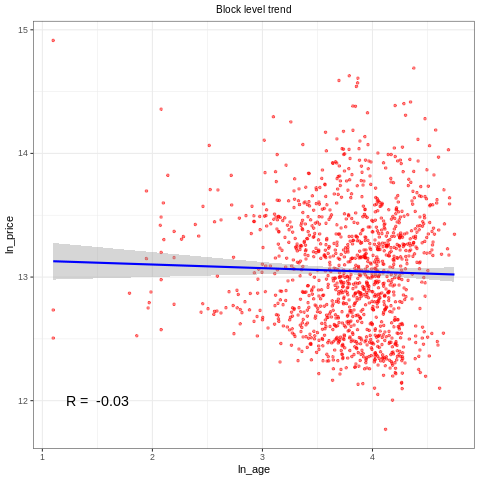

In [0]:
%%R
block = read.csv("block_level_results.csv")

plt4=ggplot(data=block, aes(x=ln_age, y=ln_price))+geom_point(colour="red",alpha=0.5,size=1)+
  geom_smooth(method="lm", se = T, col="blue")+theme_bw()+ 
  ggtitle("Block level trend")+
  theme(plot.title = element_text(hjust = 0.5,size=10))+theme(legend.position= "none")+
  annotate(x=1.5,y=12,label=paste("R = ",round(cor(block$ln_age, block$ln_price),2)),geom="text",size=5)

plt4